In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.model_selection import GridSearchCV

First we are importing and making the data frame of our training dataset from github raw data

In [2]:
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")

In [3]:
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


So our training dataset is having 31647 rows with 18 columns, including target variable

Now we are importing our testing dataset from github raw data and making the data frame of the same

In [4]:
df2=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

In [5]:
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


So our testing dataset is having 13564 rows & 17 columns, without target variable

In [6]:
df1.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
df2.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

The good thing is that, there are no Missing Values in both the df1 & df2 datasets of traing & testing respectively

In [8]:
df1.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
df2.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

Both the dataset's features are either of integer data type or object data type. So we would have to convert these object data types to numeric type for further ML model making and predictions.

In [10]:
df1.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
14353,13500,35,management,married,tertiary,no,2682,yes,no,cellular,9,jul,156,1,-1,0,unknown,no


In [11]:
df2.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13502,33060,31,technician,single,secondary,no,538,yes,no,cellular,17,apr,660,3,-1,0,unknown


By the above samples, we have observed that for the binary prediction (Yes/No) of the chances to subscribe for the Term Deposit or not, there are no need of Customer's ID variable, as it is not going to effect our target variable. So we are droping this first columns of ID from both the datasets.

In [12]:
df1.drop(['ID'],axis=1,inplace=True)

In [13]:
df2.drop(['ID'],axis=1,inplace=True)

In [14]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [15]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [16]:
df1.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Now we are going to do data preprocessing and model making works on our df1 traing dataset

In [17]:
df1.shape

(31647, 17)

First we are converting the object types to integer types via label encoder, using for loop

In [18]:
le=sklearn.preprocessing.LabelEncoder()

In [19]:
for c in df1.select_dtypes(include="object").columns:
    df1[c]=le.fit_transform(df1[c].astype(str))

In [20]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [21]:
df1.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

Similarly we are converting the oject data type of our testing dataset df2 to integer data type for its further usage.

In [22]:
for c in df2.select_dtypes(include="object").columns:
    df2[c]=le.fit_transform(df2[c].astype(str))

In [23]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [24]:
df1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


By the above non graphical observation, we found that the "balance" column is having huge deviation of Mean from Median (50% Percentile) and the difference between the 75% percentile and maximum value of balance column is also very high, so very large amount of outlier possibility are there.

age              AxesSubplot(0.125,0.653529;0.110714x0.226471)
job           AxesSubplot(0.257857,0.653529;0.110714x0.226471)
marital       AxesSubplot(0.390714,0.653529;0.110714x0.226471)
education     AxesSubplot(0.523571,0.653529;0.110714x0.226471)
default       AxesSubplot(0.656429,0.653529;0.110714x0.226471)
balance       AxesSubplot(0.789286,0.653529;0.110714x0.226471)
housing          AxesSubplot(0.125,0.381765;0.110714x0.226471)
loan          AxesSubplot(0.257857,0.381765;0.110714x0.226471)
contact       AxesSubplot(0.390714,0.381765;0.110714x0.226471)
day           AxesSubplot(0.523571,0.381765;0.110714x0.226471)
month         AxesSubplot(0.656429,0.381765;0.110714x0.226471)
duration      AxesSubplot(0.789286,0.381765;0.110714x0.226471)
campaign             AxesSubplot(0.125,0.11;0.110714x0.226471)
pdays             AxesSubplot(0.257857,0.11;0.110714x0.226471)
previous          AxesSubplot(0.390714,0.11;0.110714x0.226471)
poutcome          AxesSubplot(0.523571,0.11;0.110714x0.

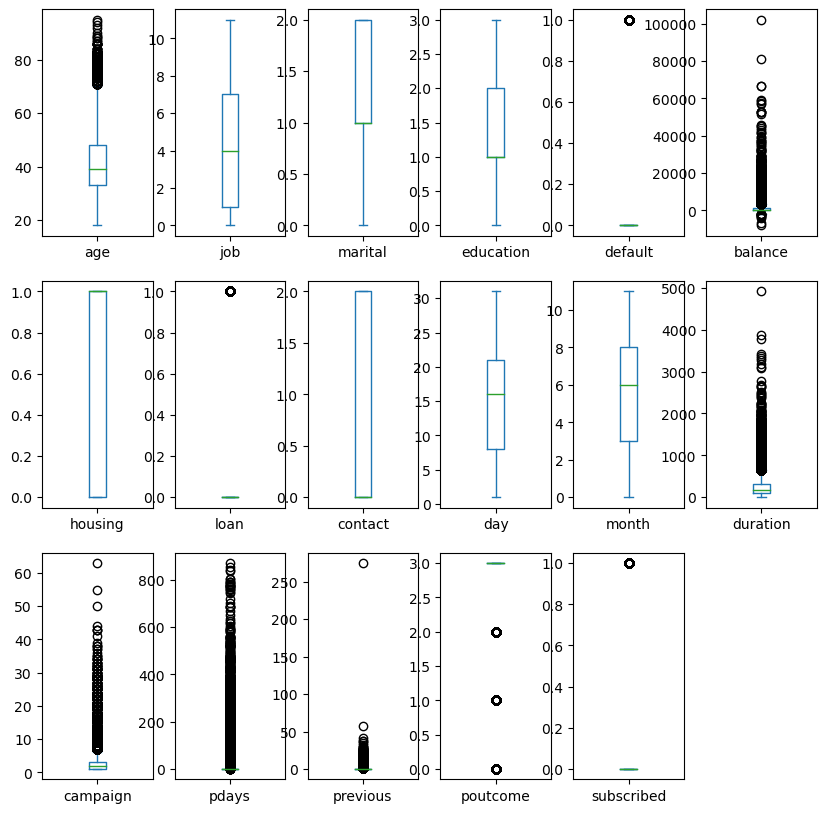

In [25]:
df1.plot(kind='box', subplots=True, layout=(3,6), figsize=(10,10))

By using the above boxplot graphical presentation, we got that features age, balance, duration, campaign, pdays & previous are having outliers.

To see the effect of some of our feature on target variable, we are doing the bivariate graphical analysis via scatter plot here

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

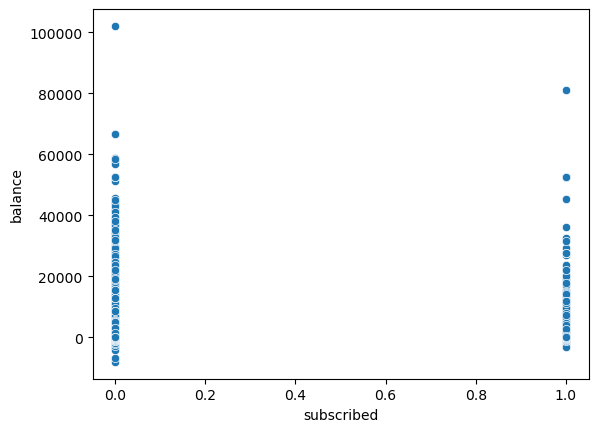

In [26]:
sns.scatterplot(df1['subscribed'],df1['balance'])

By the above plot, we observed that the bank balance of the customers are not effecting so much for thier chances to be the Subscriber of Term Deposit. Even more Balance in Bank Account reduces the chances of availing Term Deposit as per above scatter plot.

<AxesSubplot:xlabel='subscribed', ylabel='age'>

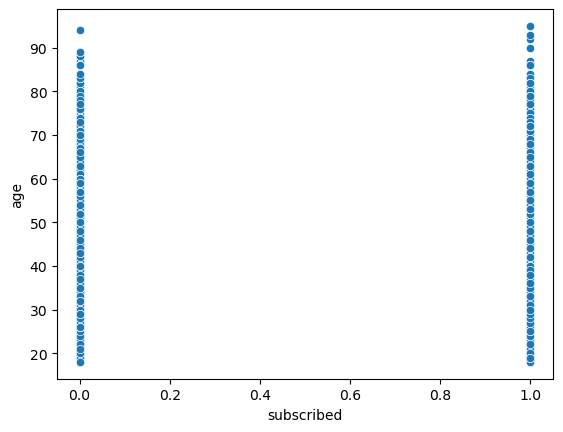

In [27]:
sns.scatterplot(df1['subscribed'],df1['age'])

By the above graph, the age is also not very effective to the target variable, as each age group customers between 20 Years to 90 Years has equal chances of both No and Yes for Term Deposit subscription. But above 90 Years of age the more chances is of Yes as per the above graph.

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

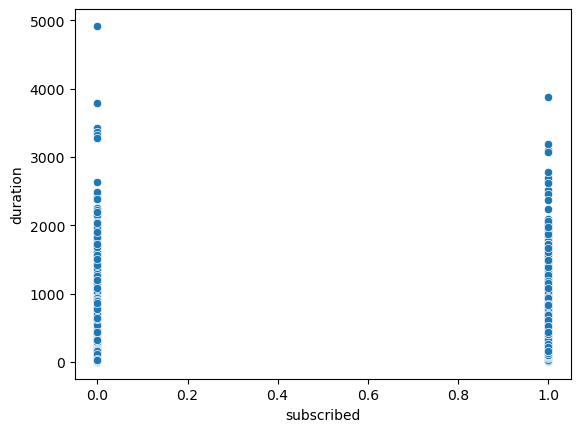

In [28]:
sns.scatterplot(df1['subscribed'],df1['duration'])

Between a limited duration of Marketing Calls is leading to both the chances of Yes & No for FD. But long duration of calls can lead to a negative effect to get the FD and customers says No as per the graph.

<AxesSubplot:xlabel='subscribed', ylabel='loan'>

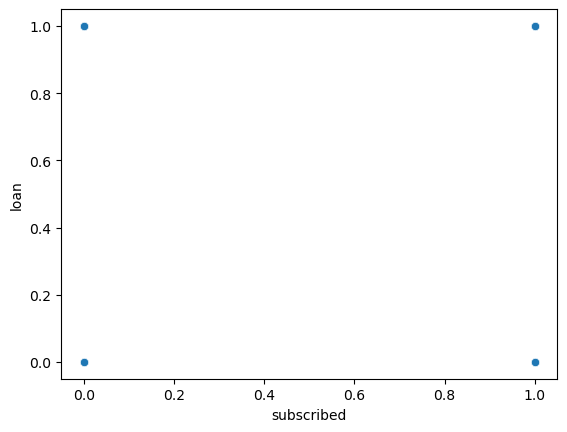

In [29]:
sns.scatterplot(df1['subscribed'],df1['loan'])

The loan feature is not effecting our target variable anyway, So it should be droped later.

<AxesSubplot:xlabel='subscribed', ylabel='campaign'>

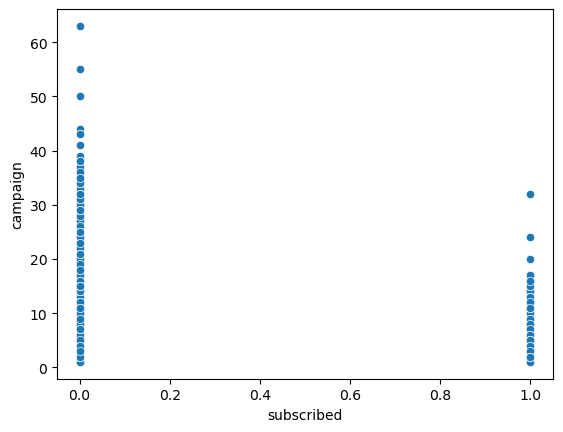

In [30]:
sns.scatterplot(df1['subscribed'],df1['campaign'])

The more the campaingin done, the less the chances of getting Term Deposit as per above graph.

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

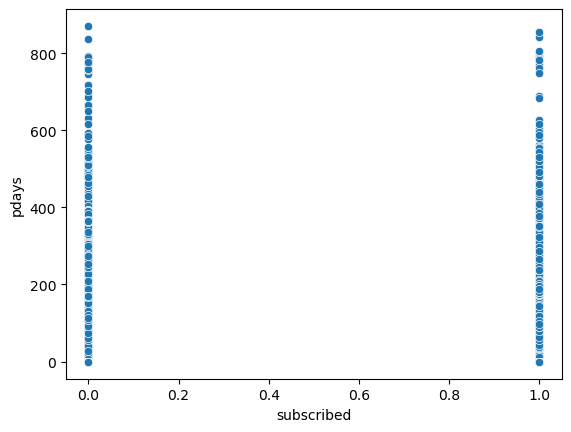

In [31]:
sns.scatterplot(df1['subscribed'],df1['pdays'])

No of days past after the last contacted with customer is having almost equal effect to target variable for say Yes or No as per above graph.

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

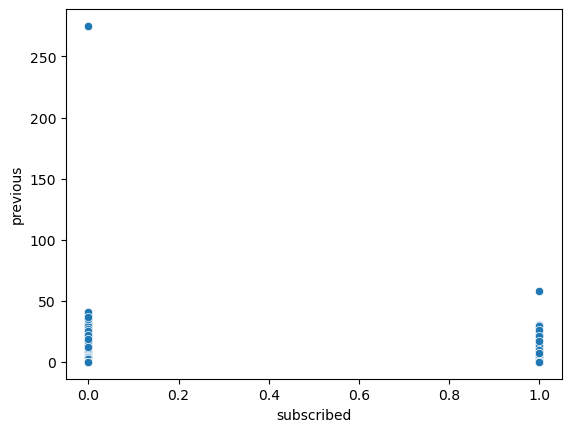

In [32]:
sns.scatterplot(df1['subscribed'],df1['previous'])

Previous contact before current campaign is also having the almost equal effect to say Yes or No with the above graph.

<AxesSubplot:xlabel='subscribed', ylabel='default'>

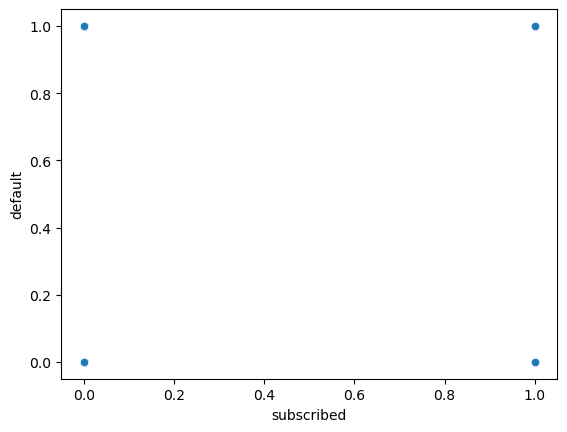

In [33]:
sns.scatterplot(df1['subscribed'],df1['default'])

The credit in default binary feature has both the chances of Yes or No for target binary variable. So not contributing to the target variable anyway.

<AxesSubplot:xlabel='subscribed', ylabel='poutcome'>

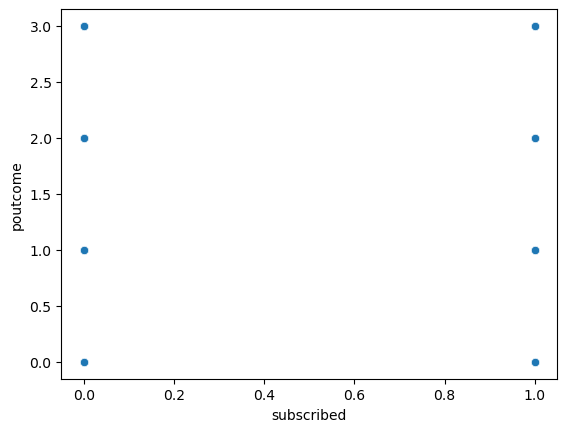

In [34]:
sns.scatterplot(df1['subscribed'],df1['poutcome'])

It is showing the parallel effect between the poutcome and subscribed variables in above graph.

Now let's check the corelation between the features via non graphical and graphical analysis below.

In [35]:
df1cor=df1.corr()

In [36]:
df1cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


<AxesSubplot:>

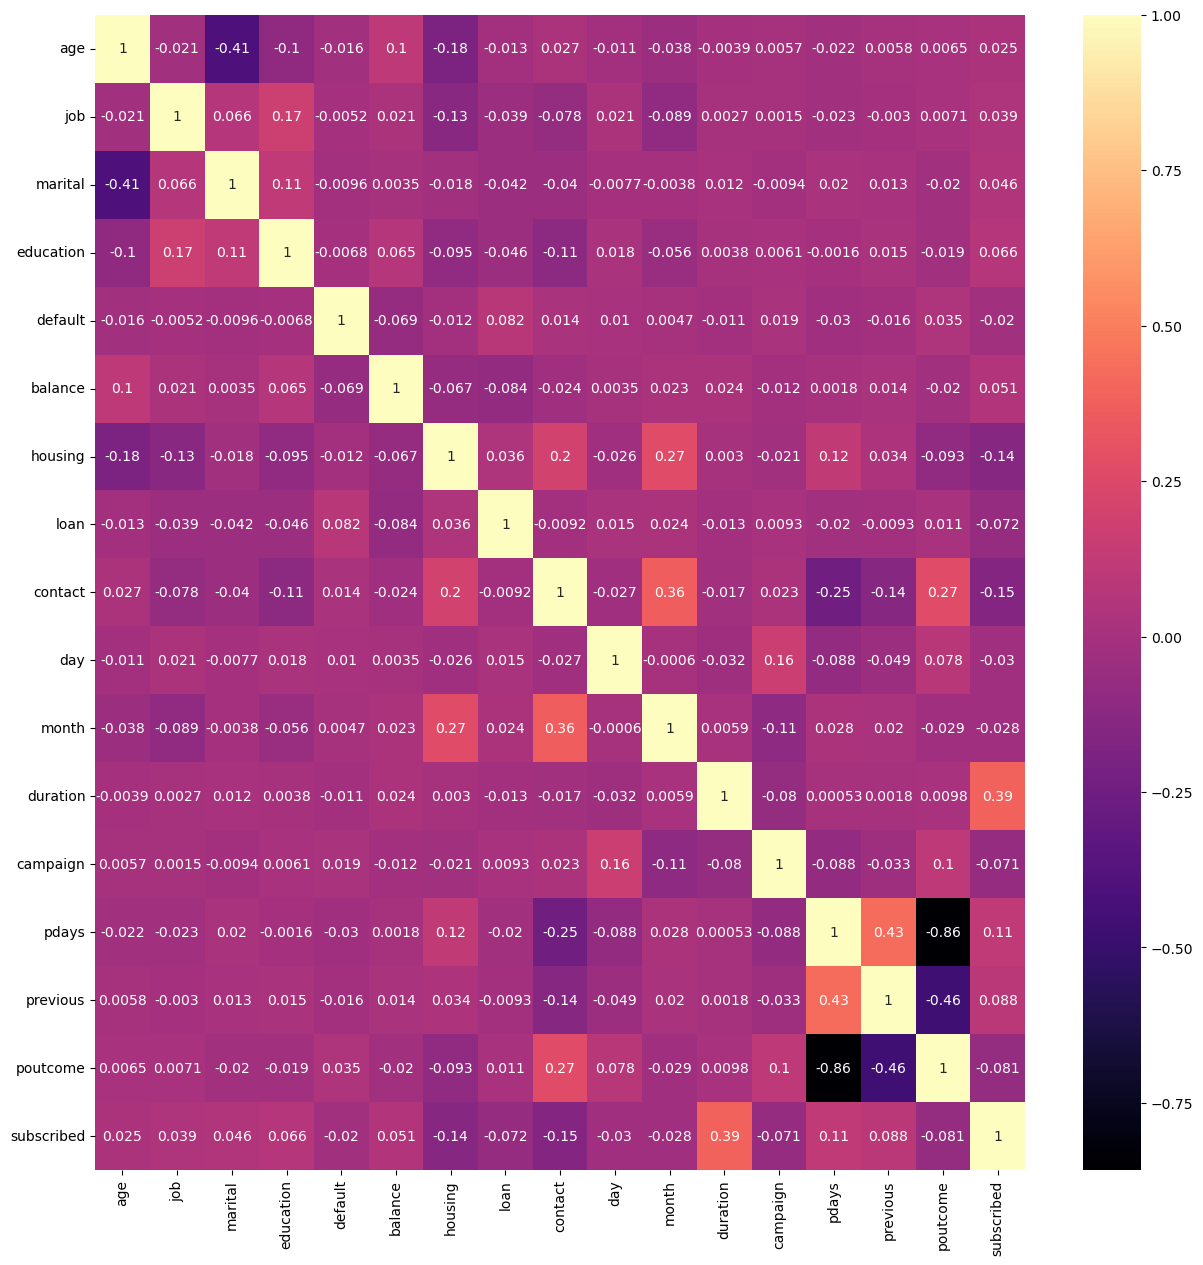

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df1cor,cmap='magma',annot=True)

By the above heatmap also, we found that the corelation of target variable with default is only -0.02 and with day is only -0.03 so we can drop both of this columns to reduce some noise in dataset.

In [38]:
df1.drop(['default'],axis=1,inplace=True)

In [39]:
df1.drop(['day'],axis=1,inplace=True)

In [40]:
df1

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,1933,0,0,1,9,44,2,-1,0,3,0
1,31,11,1,1,3,0,0,0,5,91,2,-1,0,3,0
2,27,7,1,1,891,1,0,0,5,240,1,-1,0,3,0
3,57,4,0,2,3287,0,0,0,6,867,1,84,3,2,1
4,31,9,1,1,119,1,0,0,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,0,8,116,2,-1,0,3,0
31643,53,4,0,2,380,0,1,0,6,438,2,-1,0,3,1
31644,32,4,2,2,312,0,0,0,1,37,3,-1,0,3,0
31645,57,9,1,1,225,1,0,1,8,22,7,337,12,0,0


Now checking the skewness of the current dataset

In [41]:
df1.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

<AxesSubplot:xlabel='previous', ylabel='Density'>

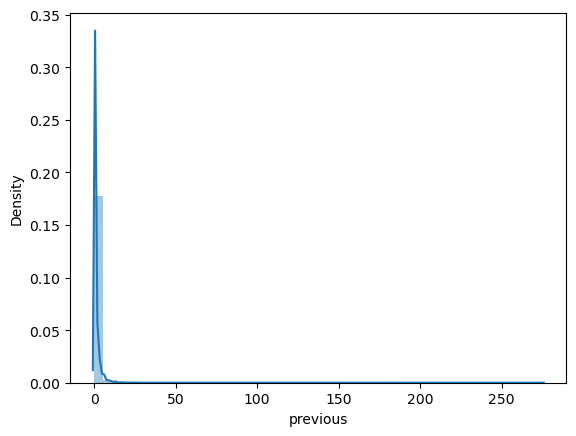

In [42]:
sns.distplot(df1['previous'])

As the feature "previous" is totally one sided data with large skewness of over 49 and the corelation of this column with the target variable is only -0.088. In place of handling this huge skewness and outeirs, we are going to simply drop this column also.

In [43]:
df1.drop(['previous'],axis=1,inplace=True)

As loan, campaign & poutcome corelation with target variable are almost nearby 0 (Zero), So istead of reducing its skewness and outliers, we are going to drop these columns also.

In [44]:
df1.drop(['loan'],axis=1,inplace=True)

In [45]:
df1.drop(['campaign'],axis=1,inplace=True)

In [46]:
df1.drop(['poutcome'],axis=1,inplace=True)

In [47]:
df1

,age,job,marital,education,balance,housing,contact,month,duration,pdays,subscribed
0,56,0,1,3,1933,0,1,9,44,-1,0
1,31,11,1,1,3,0,0,5,91,-1,0
2,27,7,1,1,891,1,0,5,240,-1,0
3,57,4,0,2,3287,0,0,6,867,84,1
4,31,9,1,1,119,1,0,3,380,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,8,116,-1,0
31643,53,4,0,2,380,0,0,6,438,-1,1
31644,32,4,2,2,312,0,0,1,37,-1,0
31645,57,9,1,1,225,1,1,8,22,337,0


In [48]:
df1.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
balance       7.995696
housing      -0.223918
contact       0.758602
month        -0.486498
duration      3.199766
pdays         2.642374
subscribed    2.377445
dtype: float64

Now we are going to handle with the most skewed feature of the remaining dataset

<AxesSubplot:xlabel='balance', ylabel='Density'>

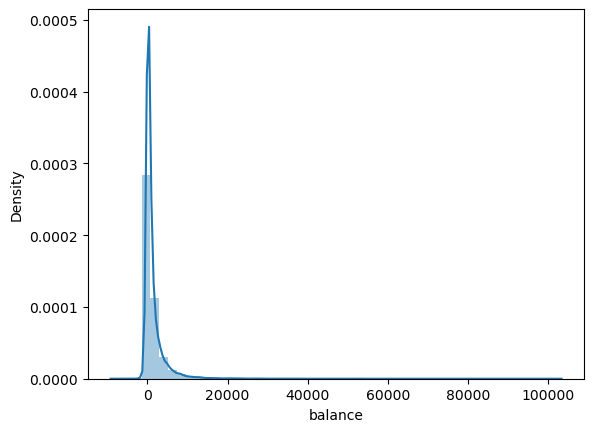

In [49]:
sns.distplot(df1['balance'])

In [50]:
df1['balance']=boxcox(df1['balance'],.5)

<AxesSubplot:xlabel='balance', ylabel='Density'>

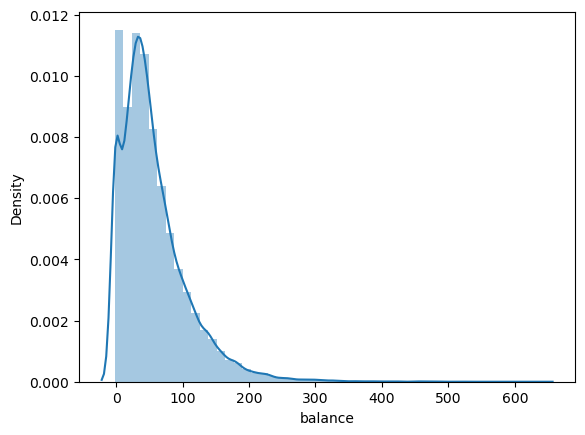

In [51]:
sns.distplot(df1['balance'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

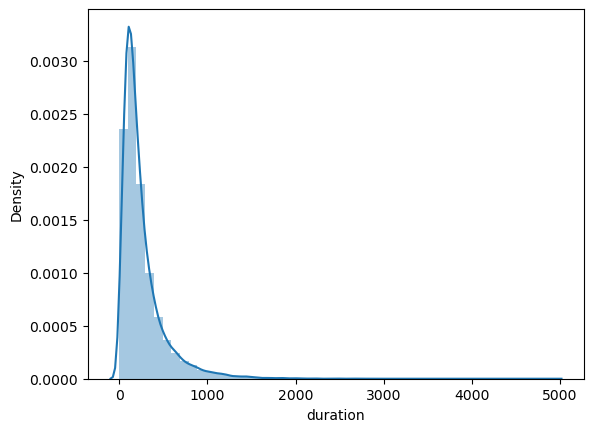

In [52]:
sns.distplot(df1['duration'])

In [53]:
df1['duration']=boxcox(df1['duration'],.5)

<AxesSubplot:xlabel='duration', ylabel='Density'>

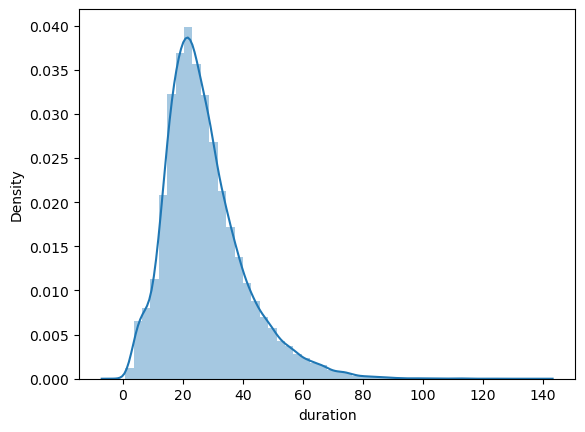

In [54]:
sns.distplot(df1['duration'])

<AxesSubplot:xlabel='pdays', ylabel='Density'>

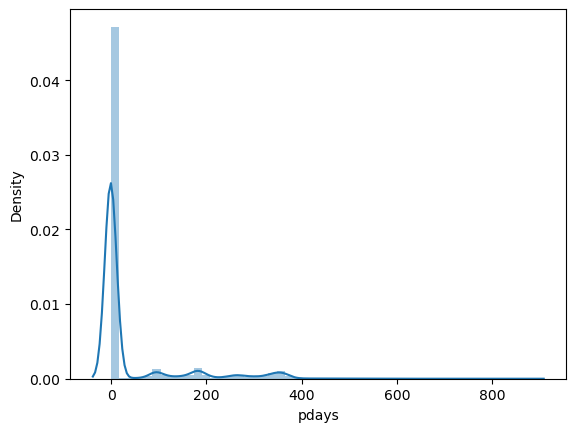

In [55]:
sns.distplot(df1['pdays'])

In [56]:
df1['pdays']=boxcox(df1['pdays'],.5)

<AxesSubplot:xlabel='pdays', ylabel='Density'>

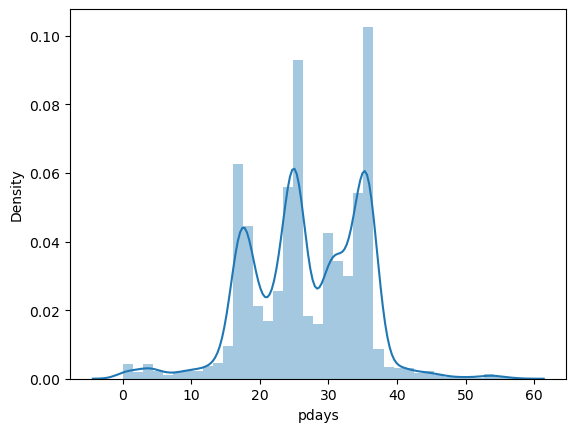

In [57]:
sns.distplot(df1['pdays'])

In [58]:
df1.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
balance       1.886565
housing      -0.223918
contact       0.758602
month        -0.486498
duration      1.179872
pdays        -0.288665
subscribed    2.377445
dtype: float64

Now all the skewness values are above -1 and below 1 which are ok. So we are going to check that whether the zscore value than value 3 both side or in between the normal distribution.

In [59]:
z=np.abs(zscore(df1))
z

,age,job,marital,education,balance,housing,contact,month,duration,pdays,subscribed
0,1.415793,1.324317,0.275405,2.369229,NaN,1.118201,0.395076,1.154007,1.209649,NaN,0.364694
1,0.937156,2.037729,0.275405,0.300345,NaN,1.118201,0.716695,0.177462,0.770554,NaN,0.364694
2,1.313627,0.815167,0.275405,0.300345,NaN,0.894294,0.716695,0.177462,0.128826,NaN,0.364694
3,1.509911,0.101755,1.922374,1.034442,NaN,1.118201,0.716695,0.155405,2.237000,NaN,2.742026
4,0.937156,1.426448,0.275405,0.300345,NaN,0.894294,0.716695,0.843197,0.733443,NaN,0.364694
...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,NaN,0.894294,0.716695,0.821140,0.584570,NaN,0.364694
31643,1.133439,0.101755,1.922374,1.034442,NaN,1.118201,0.716695,0.155405,0.950239,NaN,2.742026
31644,0.843038,0.101755,1.371563,1.034442,NaN,1.118201,0.716695,1.508931,1.292823,NaN,0.364694
31645,1.509911,1.426448,0.275405,0.300345,NaN,0.894294,0.395076,0.821140,1.503195,NaN,0.364694


In [60]:
check_below_zscore=df1[(z<3).all(axis=1)]
check_below_zscore

,age,job,marital,education,balance,housing,contact,month,duration,pdays,subscribed


By above we found that all the data are between 3 value of zscore both sides. So we will use the same df1 for making our ML model.

In [61]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
balance        2665
housing           0
contact           0
month             0
duration          0
pdays         25924
subscribed        0
dtype: int64

By using the boxcox method, 2 columns "balance" and "pday" again got the missing values. So we are replacing these NaN values with 0 (Zero) for making our ML model predictable.

In [62]:
df1['balance']=df1['balance'].fillna(0)

In [63]:
df1['pdays']=df1['pdays'].fillna(0)

In [64]:
df1.isnull().sum()

age           0
job           0
marital       0
education     0
balance       0
housing       0
contact       0
month         0
duration      0
pdays         0
subscribed    0
dtype: int64

In [65]:
df1

,age,job,marital,education,balance,housing,contact,month,duration,pdays,subscribed
0,56,0,1,3,85.931792,0,1,9,11.266499,0.000000,0
1,31,11,1,1,1.464102,0,0,5,17.078784,0.000000,0
2,27,7,1,1,57.699246,1,0,5,28.983867,0.000000,0
3,57,4,0,2,112.664729,0,0,6,56.889727,16.330303,1
4,31,9,1,1,19.817424,1,0,3,36.987177,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,-2.000000,1,0,8,19.540659,0.000000,0
31643,53,4,0,2,36.987177,0,0,6,39.856899,0.000000,1
31644,32,4,2,2,33.327043,0,0,1,10.165525,0.000000,0
31645,57,9,1,1,28.000000,1,1,8,7.380832,34.715120,0


In [66]:
df1.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
balance       1.867688
housing      -0.223918
contact       0.758602
month        -0.486498
duration      1.179872
pdays         2.006395
subscribed    2.377445
dtype: float64

The skewness is now not much more and is enough for our further process.

In [67]:
x=df1.iloc[:,0:-1]

In [68]:
x.shape

(31647, 10)

In [69]:
y=df1.iloc[:,-1]

In [70]:
y.shape

(31647,)

In [71]:
lr=LogisticRegression()

In [72]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(xtrain,ytrain)
    pred1=lr.predict(xtest)
    ascore=accuracy_score(ytest,pred1)
    print(ascore)

0.8886255924170616
0.8868878357030016
0.8883096366508689
0.8873617693522907
0.8890995260663507
0.8919431279620853
0.8860979462875197
0.8872037914691943
0.8921011058451817
0.8894154818325435
0.8938388625592417
0.8846761453396524
0.8867298578199052
0.8837282780410742
0.8911532385466034
0.8968404423380727
0.8842022116903634
0.8870458135860979
0.8889415481832543
0.8848341232227488
0.8879936808846761
0.888783570300158
0.8873617693522907
0.8830963665086888
0.8837282780410742
0.8914691943127963
0.8914691943127963
0.8886255924170616
0.8856240126382307
0.8927330173775672
0.8881516587677725
0.8889415481832543
0.8872037914691943
0.8911532385466034
0.885781990521327
0.8830963665086888
0.890521327014218
0.8865718799368089
0.8830963665086888
0.890521327014218
0.882780410742496
0.8878357030015798
0.8876777251184834
0.8842022116903634
0.8886255924170616
0.8928909952606635
0.8943127962085308
0.8897314375987362
0.8851500789889416
0.8854660347551343


In [73]:
dt=DecisionTreeClassifier()

In [74]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    dt.fit(xtrain,ytrain)
    pred2=dt.predict(xtest)
    ascore=accuracy_score(ytest,pred2)
    print(ascore)

0.8665086887835703
0.8646129541864139
0.863349131121643
0.8660347551342812
0.8671406003159557
0.8703001579778831
0.8674565560821484
0.8699842022116904
0.8671406003159557
0.8641390205371248
0.866824644549763
0.8617693522906793
0.859083728278041
0.8671406003159557
0.8644549763033176
0.8666666666666667
0.8671406003159557
0.8614533965244866
0.8703001579778831
0.8687203791469195
0.866824644549763
0.8685624012638231
0.868088467614534
0.8688783570300158
0.8582938388625593
0.8622432859399684
0.8720379146919431
0.8661927330173775
0.8649289099526066
0.8723538704581358
0.8717219589257504
0.8663507109004739
0.8649289099526066
0.8747235387045813
0.8646129541864139
0.862085308056872
0.8695102685624012
0.8688783570300158
0.8658767772511848
0.8729857819905213
0.8600315955766192
0.8665086887835703
0.863349131121643
0.8672985781990521
0.8663507109004739
0.8709320695102686
0.874565560821485
0.8674565560821484
0.8646129541864139
0.8612954186413903


In [75]:
gnb=GaussianNB()

In [76]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    gnb.fit(xtrain,ytrain)
    pred3=gnb.predict(xtest)
    ascore=accuracy_score(ytest,pred3)
    print(ascore)

0.8829383886255924
0.885308056872038
0.8807266982622433
0.8816745655608215
0.8807266982622433
0.8883096366508689
0.8837282780410742
0.8805687203791469
0.8867298578199052
0.8843601895734597
0.8875197472353871
0.8774091627172196
0.8830963665086888
0.8805687203791469
0.8906793048973144
0.8883096366508689
0.8848341232227488
0.8842022116903634
0.882306477093207
0.8794628751974723
0.885781990521327
0.8807266982622433
0.8837282780410742
0.8780410742496051
0.8819905213270142
0.8894154818325435
0.8870458135860979
0.8840442338072669
0.8785150078988941
0.8886255924170616
0.882780410742496
0.8884676145339653
0.8830963665086888
0.8848341232227488
0.8810426540284361
0.8824644549763033
0.8837282780410742
0.8840442338072669
0.8761453396524487
0.8878357030015798
0.8805687203791469
0.8911532385466034
0.8802527646129542
0.8788309636650868
0.8849921011058451
0.8876777251184834
0.888783570300158
0.8856240126382307
0.8840442338072669
0.8789889415481833


In [77]:
bnb=BernoulliNB()

In [78]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    bnb.fit(xtrain,ytrain)
    pred4=bnb.predict(xtest)
    ascore=accuracy_score(ytest,pred4)
    print(ascore)

0.8808846761453396
0.8812006319115324
0.8856240126382307
0.8832543443917852
0.8851500789889416
0.8835703001579779
0.8813586097946288
0.8845181674565561
0.8829383886255924
0.8826224328593997
0.8810426540284361
0.8781990521327014
0.8848341232227488
0.8778830963665087
0.885308056872038
0.8837282780410742
0.8766192733017377
0.8775671406003159
0.882780410742496
0.8772511848341232
0.8769352290679305
0.8838862559241706
0.8875197472353871
0.879778830963665
0.879778830963665
0.8816745655608215
0.8816745655608215
0.8783570300157978
0.8789889415481833
0.8837282780410742
0.8862559241706162
0.8854660347551343
0.8873617693522907
0.8843601895734597
0.879778830963665
0.8770932069510269
0.8830963665086888
0.8818325434439178
0.8800947867298579
0.8815165876777251
0.8777251184834123
0.8804107424960506
0.8846761453396524
0.879778830963665
0.8791469194312796
0.8849921011058451
0.8872037914691943
0.8835703001579779
0.8785150078988941
0.8799368088467614


In [79]:
rf=RandomForestClassifier()

In [80]:
for i in range(0,10):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    rf.fit(xtrain,ytrain)
    pred5=rf.predict(xtest)
    ascore=accuracy_score(ytest,pred5)
    print(ascore)

0.8951026856240126
0.8990521327014218
0.896998420221169
0.8996840442338072
0.9001579778830964
0.9071090047393365
0.9015797788309636
0.9018957345971564
0.9012638230647709
0.8981042654028436


In [81]:
kn=KNeighborsClassifier()

In [82]:
for i in range(0,10):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    kn.fit(xtrain,ytrain)
    pred6=kn.predict(xtest)
    ascore=accuracy_score(ytest,pred6)
    print(ascore)

0.8789889415481833
0.8826224328593997
0.8838862559241706
0.8843601895734597
0.8838862559241706
0.8846761453396524
0.8832543443917852
0.8843601895734597
0.8813586097946288
0.8832543443917852


In [83]:
sg=SGDClassifier()

In [84]:
for i in range(0,10):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    sg.fit(xtrain,ytrain)
    pred7=sg.predict(xtest)
    ascore=accuracy_score(ytest,pred7)
    print(ascore)

0.8600315955766192
0.8090047393364929
0.8860979462875197
0.8756714060031595
0.8260663507109005
0.8061611374407583
0.8593996840442338
0.8601895734597157
0.8846761453396524
0.8537124802527646


In [85]:
rg=RidgeClassifier()

In [86]:
for i in range(0,10):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    rg.fit(xtrain,ytrain)
    pred8=rg.predict(xtest)
    ascore=accuracy_score(ytest,pred8)
    print(ascore)

0.8846761453396524
0.8860979462875197
0.8889415481832543
0.8873617693522907
0.8925750394944708
0.8897314375987362
0.8842022116903634
0.8860979462875197
0.8898894154818325
0.8897314375987362


By testing the above algos with different random states, we found the algorithm Random Forest Classifier with 5 random state with above 90% accurate prediction. so we are doing the same below.

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=5)
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [88]:
rfpred=rf.predict(xtest)

In [89]:
accuracy_score(ytest,rfpred)

0.9058451816745655

In [90]:
confusion_matrix(ytest,rfpred)

array([[5430,  176],
       [ 420,  304]], dtype=int64)

By the above confustion matrix, we found that out of approximately 10% of the not well predicted data, 185 rows are lying in False Positive and 415 Rows are lying in False Negative.

Now we are doing the Cross Validation with this model

In [91]:
cv1=cross_val_score(rf,x,y,cv=KFold(n_splits=5))

In [92]:
cv1

array([0.90126382, 0.90173776, 0.89840417, 0.89966819, 0.8999842 ])

In [93]:
cv1.mean()

0.9002116289594001

In [94]:
cv2=cross_val_score(rf,x,y,cv=StratifiedKFold(n_splits=5))

In [95]:
cv2

array([0.89952607, 0.90157978, 0.89840417, 0.89856217, 0.89951019])

In [96]:
cv2.mean()

0.8995164763518666

In [97]:
cv3=cross_val_score(rf,x,y,cv=ShuffleSplit(train_size=0.8,test_size=0.2,n_splits=5))

In [98]:
cv3

array([0.9093207 , 0.90315956, 0.89952607, 0.90315956, 0.89873618])

In [99]:
cv3.mean()

0.9027804107424962

By the above Cross Validation methods also we found approximately 90% accurate predictions. So now we are going to save our Random Forest Classifier ML Model

In [100]:
pickle.dump(rf, open('term_deposit', 'wb'))

In [101]:
rf_model=pickle.load(open('term_deposit', 'rb'))

In [102]:
rf_model_pred=rf_model.predict(xtest)

In [103]:
rf_model_pred

array([0, 0, 0, ..., 0, 1, 0])

In [104]:
accuracy_score(ytest,rf_model_pred)

0.9058451816745655

In [105]:
confusion_matrix(ytest,rf_model_pred)

array([[5430,  176],
       [ 420,  304]], dtype=int64)

In [106]:
classification_report(ytest,rf_model_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95      5606\n           1       0.63      0.42      0.50       724\n\n    accuracy                           0.91      6330\n   macro avg       0.78      0.69      0.73      6330\nweighted avg       0.89      0.91      0.90      6330\n'

By using our saved ML Model, we are getting the same result with approx 90% accuracy as above. So now we are going to do the Hyper Parameter Tuning with this saved ML Model.

In [107]:
gs=GridSearchCV(estimator=rf,param_grid={'max_depth':[2,4,6],'max_features':[4,5],'min_samples_leaf':[2,3,4]},scoring='accuracy',cv=10,refit=True,return_train_score=True)

In [108]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [109]:
HyPred=gs.best_estimator_.predict(xtest)

In [110]:
HyPred

array([0, 0, 0, ..., 0, 1, 0])

In [111]:
accuracy_score(HyPred,ytest)

0.9015797788309636

The Hyper Parameter Tuning is also giving the same prediction of approximately 90% accuracy.

So, for the prediction of Testing Data df2, first we have to drop the same columns, which we had droped from df1

In [112]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'month', 'duration', 'pdays', 'subscribed'],
      dtype='object')

In [113]:
df2.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9060,30,9,0,1,0,3028,1,0,0,28,1,65,5,-1,0,3


In [114]:
df2.drop(['default'],axis=1,inplace=True)
df2.drop(['loan'],axis=1,inplace=True)
df2.drop(['day'],axis=1,inplace=True)
df2.drop(['campaign'],axis=1,inplace=True)
df2.drop(['previous'],axis=1,inplace=True)
df2.drop(['poutcome'],axis=1,inplace=True)

In [115]:
df2

,age,job,marital,education,balance,housing,contact,month,duration,pdays
0,32,7,1,1,118,1,0,8,20,-1
1,78,5,0,0,2787,0,1,5,372,-1
2,31,6,2,2,144,1,2,8,676,-1
3,57,7,2,0,3777,1,1,8,65,-1
4,45,1,0,1,-705,0,2,5,111,-1
...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45,0,0,1,148,-1
13560,54,1,1,0,2281,1,2,6,158,-1
13561,35,5,1,0,285,1,0,4,136,-1
13562,29,0,2,1,464,0,0,9,208,91


Now the df2 traing data is same as df1 except the target variable as above

So we are predicting our Testing dataset df2 by our save ML Model

In [116]:
df2pred=rf_model.predict(df2)

In [117]:
df2pred

array([0, 1, 1, ..., 1, 1, 1])

As we are unable to check the accuracy of our testing data prediction due to the target variable is not available. We are appending our testing dataset df2 with its own target variable predicted by the saved ML Model.

In [118]:
df2.insert(10, 'subscribed', df2pred)

In [119]:
df2

,age,job,marital,education,balance,housing,contact,month,duration,pdays,subscribed
0,32,7,1,1,118,1,0,8,20,-1,0
1,78,5,0,0,2787,0,1,5,372,-1,1
2,31,6,2,2,144,1,2,8,676,-1,1
3,57,7,2,0,3777,1,1,8,65,-1,1
4,45,1,0,1,-705,0,2,5,111,-1,1
...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45,0,0,1,148,-1,0
13560,54,1,1,0,2281,1,2,6,158,-1,1
13561,35,5,1,0,285,1,0,4,136,-1,1
13562,29,0,2,1,464,0,0,9,208,91,1


Now we will concatenate both our traing and testing data and will apply our saved ML model on this combined data to see the predictions.

In [120]:
df=pd.concat([df1,df2],axis=0)

In [121]:
df

,age,job,marital,education,balance,housing,contact,month,duration,pdays,subscribed
0,56,0,1,3,85.931792,0,1,9,11.266499,0.000000,0
1,31,11,1,1,1.464102,0,0,5,17.078784,0.000000,0
2,27,7,1,1,57.699246,1,0,5,28.983867,0.000000,0
3,57,4,0,2,112.664729,0,0,6,56.889727,16.330303,1
4,31,9,1,1,19.817424,1,0,3,36.987177,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45.000000,0,0,1,148.000000,-1.000000,0
13560,54,1,1,0,2281.000000,1,2,6,158.000000,-1.000000,1
13561,35,5,1,0,285.000000,1,0,4,136.000000,-1.000000,1
13562,29,0,2,1,464.000000,0,0,9,208.000000,91.000000,1


In [122]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
balance       0
housing       0
contact       0
month         0
duration      0
pdays         0
subscribed    0
dtype: int64

In [123]:
df.shape

(45211, 11)

In [124]:
dfx=df.iloc[:,0:-1]

In [125]:
dfy=df.iloc[:,-1]

In [126]:
dfx.shape

(45211, 10)

In [127]:
dfy.shape

(45211,)

In [128]:
dfpred=rf_model.predict(dfx)

In [129]:
accuracy_score(dfy,dfpred)

0.986817367454823

In [130]:
confusion_matrix(dfy,dfpred)

array([[32173,   176],
       [  420, 12442]], dtype=int64)

By applying our combined dataset to the saved ML Model, we are getting the prediction accuracy of 99% approx as above.

We may also apply the cross validation on the combined dataset to see the results.

In [131]:
cv1=cross_val_score(rf,dfx,dfy,cv=KFold(n_splits=5))

In [132]:
cv1.mean()

0.8981883308490733

In [133]:
cv2=cross_val_score(rf,dfx,dfy,cv=StratifiedKFold(n_splits=5))

In [134]:
cv2.mean()

0.8105564989294066

In [135]:
cv3=cross_val_score(rf,dfx,dfy,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=5))

In [136]:
cv3.mean()

0.9006782659982306

So by cross validation, we are getting prediction accuracy of nearby 90%

We have saved & used the Random Forest Classifier model, did the Hyper Parameter Tuning & Cross Validations, and got the results of prediction accuracy between 90% to 99% approximately on our Training, Testing & Combined Datasets.